In [1]:
import matplotlib.pyplot as plt

from skimage import io, color,img_as_float,restoration
from skimage.transform import rescale, resize, downscale_local_mean


from skimage.filters import roberts, sobel, scharr, prewitt

from skimage import feature

import scipy.stats as st
import numpy as np

from skimage.filters.rank import entropy
from skimage.morphology import disk


from skimage.filters import try_all_threshold

from skimage.filters import threshold_otsu

from skimage.feature import hog
from skimage import data, exposure

In [2]:
img = io.imread("demo.jpg", as_gray=True)

# Rescale, resize image by a given factor. While rescaling image

# Gaussian smoothing can performed to avoid anti aliasing artifacts.

In [3]:
img_rescaled = rescale(img, 1.0 / 6.0, anti_aliasing=False)

In [4]:
print(img_rescaled)

[[8.41647059e-03 2.91542756e-03 9.16363290e-03 8.04181035e-01
  7.82210716e-01 5.62673094e-02 1.07510920e-02 8.89081972e-03]
 [3.85754902e-03 4.65866013e-03 6.47628186e-02 8.38845261e-01
  8.09876552e-01 4.57590515e-01 1.42691029e-01 7.00510621e-03]
 [4.38357843e-03 8.13956972e-03 7.25050054e-02 8.53606275e-01
  2.19467699e-01 3.45913453e-02 1.38891476e-02 4.85247549e-03]
 [9.56272059e-03 1.52045207e-02 7.99332832e-01 8.71142200e-01
  8.59066296e-01 7.91270016e-01 4.91418219e-02 2.33393192e-02]
 [8.70629902e-03 1.01420760e-01 8.36027672e-01 8.59516176e-01
  8.44429975e-01 8.91008456e-01 8.40525931e-01 1.24557353e-02]
 [6.12780229e-03 2.72151225e-02 8.06776827e-01 8.80593725e-01
  9.04105074e-01 8.94685915e-01 7.90626887e-01 1.86247304e-02]
 [7.51546841e-03 1.29600218e-02 7.86400218e-02 7.97460795e-01
  7.71968020e-01 8.39792269e-01 7.62563358e-01 6.86615986e-02]
 [1.91171569e-03 1.32091830e-02 5.20184641e-03 3.10449428e-02
  3.67604493e-01 7.99195498e-01 8.16596920e-01 4.03457026e-02]


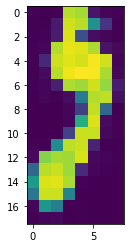

In [5]:
plt.imshow(img_rescaled)

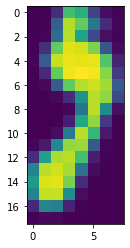

In [6]:
img_rescaled_1 = rescale(img, 1.0 / 6.0, anti_aliasing=True)
plt.imshow(img_rescaled_1)

In [7]:
img_resized = resize(img, (200, 200), anti_aliasing=True)

In [8]:
#print(img_resized)

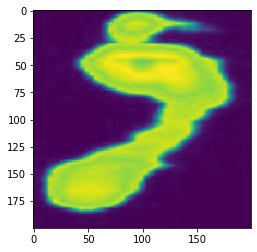

In [9]:
plt.imshow(img_resized)

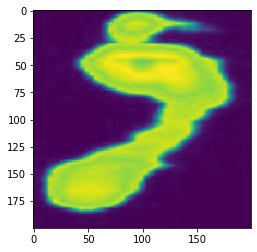

In [10]:
img_resized_1 = resize(img, (200, 200), anti_aliasing=False)
plt.imshow(img_resized_1)

# Downscale, downsample using local mean of elements of each block defined by user

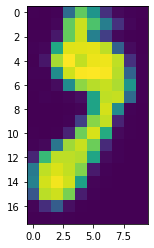

In [11]:
img_downscaled = downscale_local_mean(img, (6, 5))#very important
plt.imshow(img_downscaled)

In [12]:
#print(img.shape)

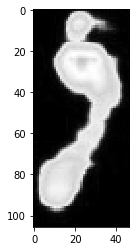

In [13]:
plt.imshow(img,cmap=plt.cm.gray, interpolation='nearest')

# Edge Detection 

In [14]:
edge_roberts = roberts(img)

In [15]:
print(edge_roberts)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00667035 0.         ... 0.00619544 0.00340167 0.        ]
 [0.         0.00561098 0.         ... 0.00198378 0.00715262 0.        ]
 ...
 [0.         0.00361767 0.0031745  ... 0.         0.         0.        ]
 [0.         0.00440463 0.00355807 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


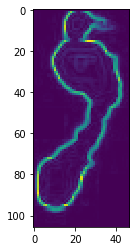

In [16]:
plt.imshow(edge_roberts)

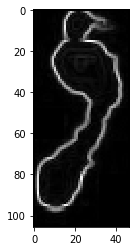

In [17]:
plt.imshow(edge_roberts, cmap=plt.cm.gray, interpolation='nearest')

In [18]:
edge_sobel = sobel(img)
edge_scharr = scharr(img)
edge_prewitt = prewitt(img)

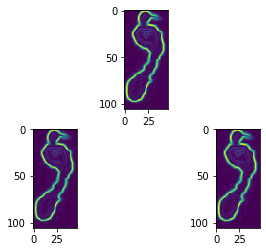

In [19]:
plt.subplot(2,1,1)
plt.imshow(edge_sobel)
plt.subplot(2,2,3)
plt.imshow(edge_scharr)
plt.subplot(2,2,4)
plt.imshow(edge_prewitt)

# Edge Detection 
## Robert Edge Detection
## Sobel
## Scharr

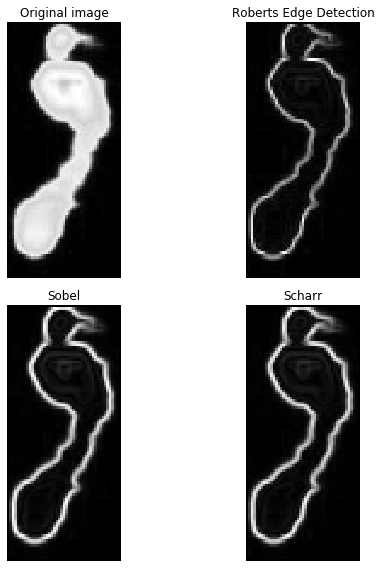

In [20]:
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True,
                         figsize=(8, 8))
ax = axes.ravel()

ax[0].imshow(img, cmap=plt.cm.gray)
ax[0].set_title('Original image')

ax[1].imshow(edge_roberts, cmap=plt.cm.gray)
ax[1].set_title('Roberts Edge Detection')

ax[2].imshow(edge_sobel, cmap=plt.cm.gray)
ax[2].set_title('Sobel')

ax[3].imshow(edge_scharr, cmap=plt.cm.gray)
ax[3].set_title('Scharr')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

# Edge Filter
### Canny

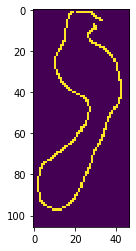

In [21]:
edge_canny = feature.canny(img, sigma=3)
plt.imshow(edge_canny)

In [22]:
psf = np.ones((3, 3))/9 

In [23]:
def gkern(kernlen=21, nsig=2):    

    lim = kernlen//2 + (kernlen % 2)/2
    x = np.linspace(-lim, lim, kernlen+1)
    kern1d = np.diff(st.norm.cdf(x))
    kern2d = np.outer(kern1d, kern1d)
    return kern2d/kern2d.sum()

In [24]:
psf = gkern(5,3)
print(psf)

[[0.003765   0.015019   0.02379159 0.015019   0.003765  ]
 [0.015019   0.05991246 0.0949073  0.05991246 0.015019  ]
 [0.02379159 0.0949073  0.15034262 0.0949073  0.02379159]
 [0.015019   0.05991246 0.0949073  0.05991246 0.015019  ]
 [0.003765   0.015019   0.02379159 0.015019   0.003765  ]]


# Image Deconvolution

## Uses deconvolution

In [25]:
deconvolved, _ = restoration.unsupervised_wiener(img, psf)
plt.imsave("deconvolved.jpg", deconvolved, cmap='gray')

In [26]:
img1 = io.imread("deconvolved.jpg")
print(img1.shape)

(106, 47, 3)


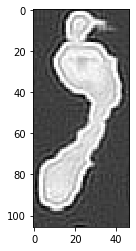

In [27]:
plt.imshow(img1)

# Entropy for a image

/home/cncdragneel/anaconda3/lib/python3.7/site-packages/skimage/filters/rank/generic.py:119: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  out_dtype)


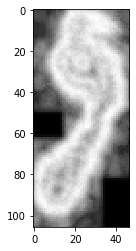

In [28]:
entropy_img = entropy(img, disk(3)) # not for 3d image or array
plt.imshow(entropy_img, cmap=plt.cm.gray)

# Applying Threshold Feature

##  Otsu Thresholding

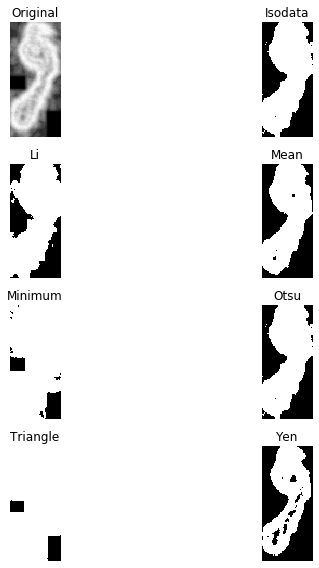

In [29]:
fig, ax = try_all_threshold(entropy_img, figsize=(10, 8), verbose=False)
plt.show()

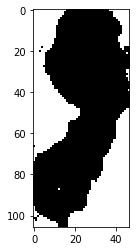

In [30]:
thresh = threshold_otsu(entropy_img)
binary= entropy_img <=thresh   
plt.imshow(binary, cmap=plt.cm.gray)

In [31]:
print("The percent white region is: ", (np.sum(binary == 1)*100)/(np.sum(binary == 0) + np.sum(binary == 1)))

The percent white region is:  38.17743877960658


# Feature 1
## Hog

In [32]:
fd,hog_image = hog(img, orientations=8, pixels_per_cell=(8, 8), cells_per_block=(1, 1), visualize=True, multichannel=False)

In [33]:
print(hog_image.max())

0.27471572684589773


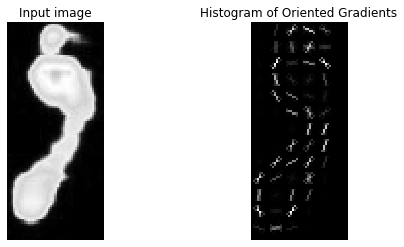

In [34]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(img, cmap=plt.cm.gray)
ax1.set_title('Input image')


hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 50))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

In [35]:
print(hog_image_rescaled)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 5.70390490e-06 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.46166814e-06 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
